In [1]:
import pandas as pd
import numpy as np
import re
import tldextract

ImportError: No module named pandas

In [2]:
df = pd.read_csv('Ereignisse.csv',sep=';',encoding='mbcs')

NameError: name 'pd' is not defined

In [3]:
sources = df[['Quelle 1*','Quelle 2','Quelle 3','Quelle 4']]

NameError: name 'df' is not defined

In [4]:
list_of_sources = []

In [5]:
for source in ['Quelle 1*','Quelle 2','Quelle 3','Quelle 4']:
    list_of_sources.extend(df[source].tolist())

In [6]:
list_of_sources.remove(' ')

In [7]:
list_of_sources = [i for i in list_of_sources if type(i) == str]

In [8]:
regex = re.compile(
        r'^(?:http|ftp)s?://' # http:// or https://
        r'(?:(?:[A-Z0-9](?:[A-Z0-9-]{0,61}[A-Z0-9])?\.)+(?:[A-Z]{2,6}\.?|[A-Z0-9-]{2,}\.?)|' #domain...
        r'localhost|' #localhost...
        r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})' # ...or ip
        r'(?::\d+)?' # optional port
        r'(?:/?|[/?]\S+)$', re.IGNORECASE)

In [9]:
urls = []

In [10]:
for i in list_of_sources:
    if re.match(regex,i) or 'http' in i:
        url = tldextract.extract(i)
        list_of_sources.append(url.domain)
        list_of_sources.remove(i)
        if i in list_of_sources:
            print('WTF')


Exception reading Public Suffix List url https://publicsuffix.org/list/public_suffix_list.dat
Traceback (most recent call last):
  File "C:\Users\abbooda\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connection.py", line 171, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "C:\Users\abbooda\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\util\connection.py", line 79, in create_connection
    raise err
  File "C:\Users\abbooda\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\util\connection.py", line 69, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [WinError 10061] Es konnte keine Verbindung hergestellt werden, da der Zielcomputer die Verbindung verweigerte

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\abbooda\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chu

No Public Suffix List found. Consider using a mirror or constructing your TLDExtract with `suffix_list_urls=None`.


In [11]:
for i in list_of_sources:
    if 'http' in i:
        url = tldextract.extract(i)
        list_of_sources.append(url.domain)
        list_of_sources.remove(i)
        if i in list_of_sources:
            print('WTF')

In [12]:
list_of_sources = [i.lower() for i in list_of_sources]

In [13]:
from collections import defaultdict  # available in Python 2.5 and newer

urls_d = defaultdict(int)
for source in list_of_sources:
    urls_d[source] += 1

In [14]:
lists = urls_d.items() # sorted by key, return a list of tuples

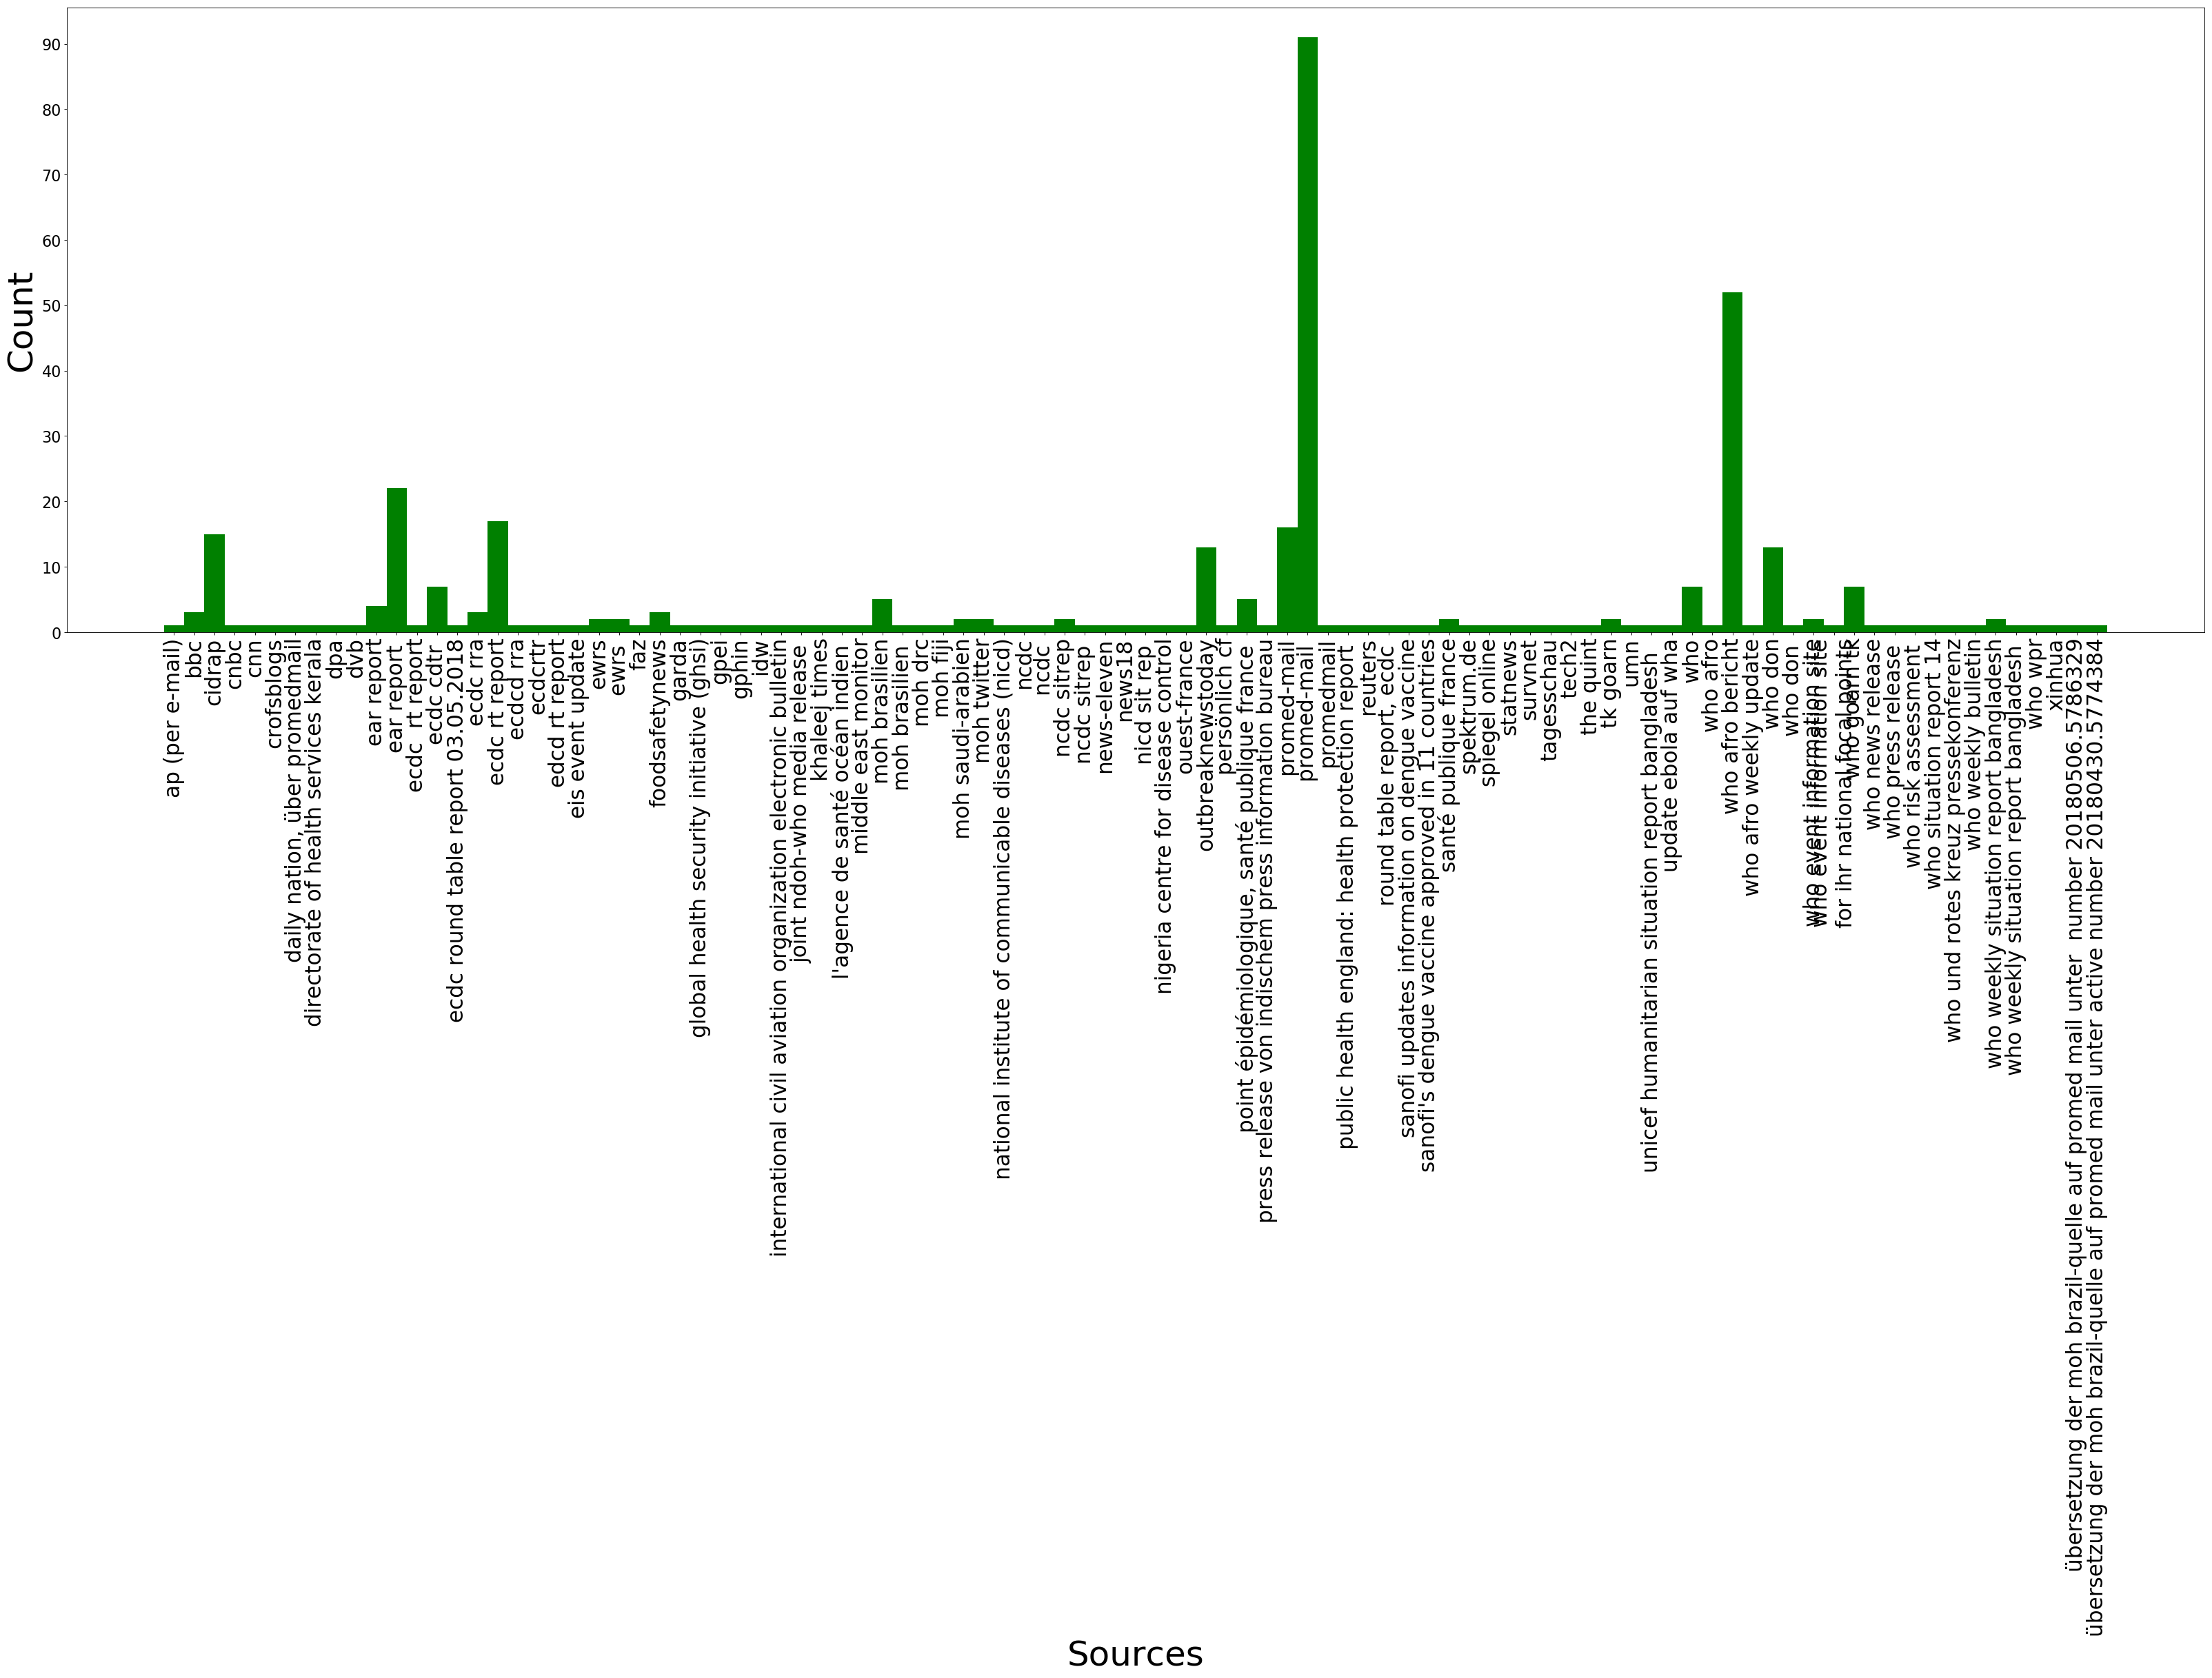

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import operator
from matplotlib.pyplot import figure

figure(num=None, figsize=(50, 15), dpi=80, facecolor='w', edgecolor='k')
lists = sorted(urls_d.items()) # sorted by key, return a list of tuples

x, y = zip(*lists)
plt.bar(x, y, 1, color='g')
plt.xticks(x, rotation='vertical',fontsize=28)
plt.yticks(np.arange(0,max(y),10), fontsize=20)

plt.xlabel('Sources', fontsize=45)
plt.ylabel('Count',fontsize=45)
plt.show()